# General NLP Categoriser of Rumours

In [4]:
import pandas as pd
import numpy as np
np.random.seed(1234)
df = pd.read_csv('RumourDatabase.csv', encoding='cp1252')
df

,Unnamed: 0,Category,Claim,Debunk_Date,Idx,Label,Source
0,0,Virus origin and properties,"Covid originated from Wuhan, China",23/11/2020,0,True,WHO
1,1,Virus origin and properties,Covid was reported on 31.12.2019,23/11/2020,1,True,WHO
2,2,Virus origin and properties,Symptom of Covid is fever,23/11/2020,2,True,WHO
3,3,Virus origin and properties,Symptom of Covid is a dry cough,23/11/2020,3,True,WHO
4,4,Virus origin and properties,Symptom of Covid is fatigue,23/11/2020,4,True,WHO
5,5,Virus origin and properties,Less common symptom of Covid is loss of taste,23/11/2020,5,True,WHO
6,6,Virus origin and properties,Less common symptom of Covid is loss of smell,23/11/2020,6,True,WHO
7,7,Virus origin and properties,Less common symptom of Covid is nasal congestion,23/11/2020,7,True,WHO
8,8,Virus origin and properties,Less common symptom of Covid is conjunctivitis...,23/11/2020,8,True,WHO
9,9,Virus origin and properties,Less common symptom of Covid is sore throat,23/11/2020,9,True,WHO


In [51]:
df_new = df.copy()
df_new['Claim'] = df_new['Claim'].str.replace(r'[_\W\d]',' ')
df_new.reindex()
df_new.head()

,Unnamed: 0,Category,Claim,Debunk_Date,Idx,Label,Source
0,0,Virus origin and properties,Covid originated from Wuhan China,23/11/2020,0,True,WHO
1,1,Virus origin and properties,Covid was reported on,23/11/2020,1,True,WHO
2,2,Virus origin and properties,Symptom of Covid is fever,23/11/2020,2,True,WHO
3,3,Virus origin and properties,Symptom of Covid is a dry cough,23/11/2020,3,True,WHO
4,4,Virus origin and properties,Symptom of Covid is fatigue,23/11/2020,4,True,WHO


In [52]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
import string
import gensim
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text(content_collection):
    wordnet_lemmatizer = WordNetLemmatizer()
    porter = PorterStemmer()
    lan_porter = LancasterStemmer()
    stop_words = set(stopwords.words('english'))
    clean_content=[]
    for content in content_collection:
        #turn string into tokens
        word_tokens = word_tokenize(content)
        words = [porter.stem(wordnet_lemmatizer.lemmatize(w.lower())) for w in word_tokens if w not in stop_words] #remove stop words
        #lowercase, remove stop words and punctuation/numbers
        clean_content.append( [w for w in words if len(w) > 3] ) 
    return clean_content
clean_content = clean_text(df_new['Claim'])
clean_content

[['covid', 'origin', 'wuhan', 'china'],
 ['covid', 'report'],
 ['symptom', 'covid', 'fever'],
 ['symptom', 'covid', 'cough'],
 ['symptom', 'covid', 'fatigu'],
 ['common', 'symptom', 'covid', 'loss', 'tast'],
 ['common', 'symptom', 'covid', 'loss', 'smell'],
 ['common', 'symptom', 'covid', 'nasal', 'congest'],
 ['common', 'symptom', 'covid', 'conjunct'],
 ['common', 'symptom', 'covid', 'sore', 'throat'],
 ['common', 'symptom', 'covid', 'headach'],
 ['common', 'symptom', 'covid', 'muscl', 'joint', 'pain'],
 ['common', 'symptom', 'covid', 'skin', 'rash'],
 ['common', 'symptom', 'covid', 'nausea', 'vomit'],
 ['common', 'symptom', 'covid', 'diarrhea'],
 ['common', 'symptom', 'covid', 'chill', 'dizzi'],
 ['sever', 'covid', 'symptom', 'short', 'breath'],
 ['sever', 'covid', 'symptom', 'loss', 'appetit'],
 ['sever', 'covid', 'symptom', 'confus'],
 ['sever', 'covid', 'symptom', 'persist', 'pain', 'pressur', 'chest'],
 ['sever', 'covid', 'symptom', 'high', 'fever'],
 ['peopl', 'diagnos', 'covid'

In [88]:
import gensim
import gensim.corpora as corpora
def train_model_claim(clean_content, num_topics=30, filter_b = 15, filter_a = 0.1):
    dictionary = gensim.corpora.Dictionary(clean_content)
    dictionary.filter_extremes(no_below=filter_b, no_above=filter_a, keep_n= 100000)
    bow_corpus = [dictionary.doc2bow(doc) for doc in clean_content]
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = num_topics, 
                                       id2word = dictionary,                                    
                                       passes = 10,
                                       workers = 2, 
                                       random_state = 12345)
    topics = []
    for idx, topic in lda_model.print_topics(-1):
        topics.append(topic)
    m = lda_model.get_document_topics(bow_corpus)
    matches = np.zeros(30)
    data = []
    for i in range(len(m)):
        prob_topics = m[i]
        if prob_topics:
            matches[prob_topics[0][0]] += 1
            prob_topics.sort(key=lambda x: x[1], reverse=True)
            data.append([df_new['Claim'][i], prob_topics[0][0], topics[prob_topics[0][0]] ])
    claim2topic = pd.DataFrame(data=data, columns = ['Claim', 'Topic', 'TopicKeyWords'])
    return claim2topic

In [89]:
claim2topic20 = train_model_claim(clean_content, num_topics=30)

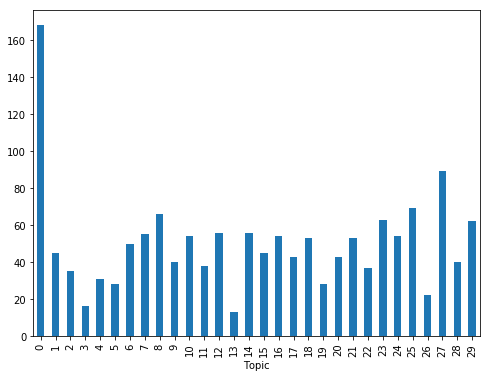

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
claim2topic20.groupby('Topic').Claim.count().plot.bar(ylim=0)
plt.show()

In [91]:
claim2topic20[claim2topic20.Topic==7]

,Claim,Topic,TopicKeyWords
120,Former NYC Mayor Rudolph Giuliani said he bou...,7,"0.392*""chines"" + 0.150*""said"" + 0.090*""patient..."
203,A video is going viral on WhatsApp and Sharech...,7,"0.392*""chines"" + 0.150*""said"" + 0.090*""patient..."
228,Video of police roughing up civilians claimed ...,7,"0.392*""chines"" + 0.150*""said"" + 0.090*""patient..."
246,WHO has said do not eat cabbage as it will in...,7,"0.392*""chines"" + 0.150*""said"" + 0.090*""patient..."
301,The Chinese Communist Party is using Zoom as ...,7,"0.392*""chines"" + 0.150*""said"" + 0.090*""patient..."
309,Says video shows the Chinese are destroying t...,7,"0.392*""chines"" + 0.150*""said"" + 0.090*""patient..."
323,The coronavirus has been released by China ...,7,"0.392*""chines"" + 0.150*""said"" + 0.090*""patient..."
406,Videos showing police detaining COVID patie...,7,"0.392*""chines"" + 0.150*""said"" + 0.090*""patient..."
647,Fish tank additive may treat coronavirus,7,"0.392*""chines"" + 0.150*""said"" + 0.090*""patient..."
668,Trump said people are dying who have never di...,7,"0.392*""chines"" + 0.150*""said"" + 0.090*""patient..."


In [92]:
claim2topic10 = train_model_claim(clean_content, num_topics=10)

In [93]:
claim2topic10[claim2topic10.Topic==0]

,Claim,Topic,TopicKeyWords
1,Covid was reported on,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
2,Symptom of Covid is fever,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
3,Symptom of Covid is a dry cough,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
4,Symptom of Covid is fatigue,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
5,Less common symptom of Covid is loss of taste,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
6,Less common symptom of Covid is loss of smell,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
7,Less common symptom of Covid is nasal congestion,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
8,Less common symptom of Covid is conjunctivitis...,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
9,Less common symptom of Covid is sore throat,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
10,Less common symptom of Covid is headache,0,"0.268*""test"" + 0.130*""posit"" + 0.100*""symptom""..."
